In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Mike\Documents\concrete strength ML\data\processed\concrete_data_cleaned.csv")
X = df.drop(columns=["strength"])
y = df["strength"]

#import files and stuff, not sure if when working in a team there's some other format for reading the file. 
#x is the feature matrix, y is the target variable (concrete strength)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#this splits the data into training and validation sets, with 20% of the data used for validation
# you do this to avoid overfitting (maybe there's a hard limit on minimum size here)
#The random_state parameter is just a seed

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = X.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
    ]
)

#StandardScaler standardizes features by removing the mean and scaling to unit variance... 
#i.e. it makes the data have a mean of 0 and a standard deviation of 1 (easier for models to work with)
# ColumnTransformer is just a neat way to perform StandardScaler on multiple columns at once

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lin_reg = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

rf_reg = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42))
])


"\npipelines avoid inconsistent preprocessing (11.1 in the SKLearn User Guide docs)\n\nThe following is a very loose, personal definition of the two models used (not sure if I'm right):\n\nLinearRegression: The classic ML model described in 3Blue1Brown's videos in ML. \n         It assumes a linear relationship, plus some noise. Seeks to minimize sum of squared errors\n         and basically calculates coefficients (weights) for each feature.\n\nRandomForestRegressor: In my mind each tree is like a plinko board, just without the binary \n         distribution (or a super complex flow chart). Here, we made 300 of these trees, each\n         trained on a random subset of the data and features. Each tree gives a prediction,\n         and the final prediction is the average of all tree predictions. This is good for \n         non-linear relationships and reduces overfitting. \n"

pipelines avoid inconsistent preprocessing (11.1 in the SKLearn User Guide docs)

The following is a very loose, personal definition of the two models used (not sure if I'm right):

LinearRegression: The classic ML model described in 3Blue1Brown's videos in ML. 
         It assumes a linear relationship, plus some noise. Seeks to minimize sum of squared errors
         and basically calculates coefficients (weights) for each feature.

RandomForestRegressor: In my mind each tree is like a plinko board, just without the binary 
         distribution (or a super complex flow chart). Here, we made 300 of these trees, each
         trained on a random subset of the data and features. Each tree gives a prediction,
         and the final prediction is the average of all tree predictions. This is good for 
         non-linear relationships and reduces overfitting. 

In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in [("Linear", lin_reg), ("RandomForest", rf_reg)]:
    scores = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring="neg_root_mean_squared_error"
    )
    print(name, "CV RMSE:", -scores.mean())

# Section 3.1 in SKLearn User Guide docs. 

# Apparently because we're doing regression models here and not classification models 
# (look into this more), we need to 
# include the line scoring="neg_root_mean_squared_error" to get RMSE (Root Mean Squared Error) scores.
# To interpret this score, lower is better. It represents the average difference between the predicted
# and actual values, with larger errors being penalized more heavily due to squaring.



Linear CV RMSE: 10.664267002163125
RandomForest CV RMSE: 5.08250101049376


'\nApparently because we\'re doing regression models here and not classification models, we need to \ninclude the line scoring="neg_root_mean_squared_error" to get RMSE (Root Mean Squared Error) scores.\n\n'

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Linear Regression
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_val)

rmse_lin = np.sqrt(mean_squared_error(y_val, y_pred_lin))
mae_lin = mean_absolute_error(y_val, y_pred_lin)
r2_lin = r2_score(y_val, y_pred_lin)

print("Linear RMSE:", rmse_lin)
print("Linear MAE:", mae_lin)
print("Linear R²:", r2_lin)

# Random Forest
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_val)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print("RF RMSE:", rmse_rf)
print("RF MAE:", mae_rf)
print("RF R²:", r2_rf)


Linear RMSE: 9.79647590162436
Linear MAE: 7.745559243921434
Linear R²: 0.627553179231485
RF RMSE: 5.542212709221521
RF MAE: 3.792174601826173
RF R²: 0.8807959798252127


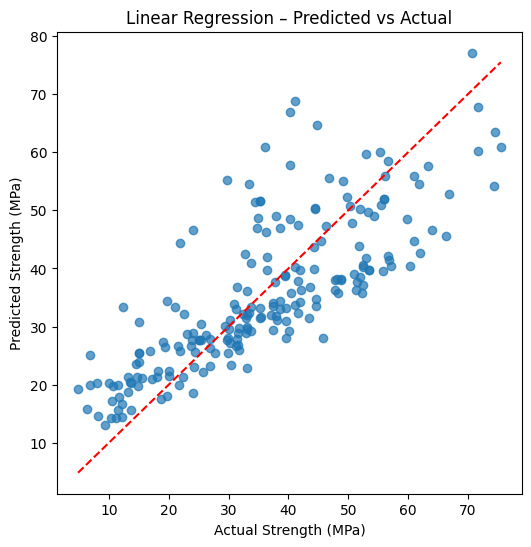

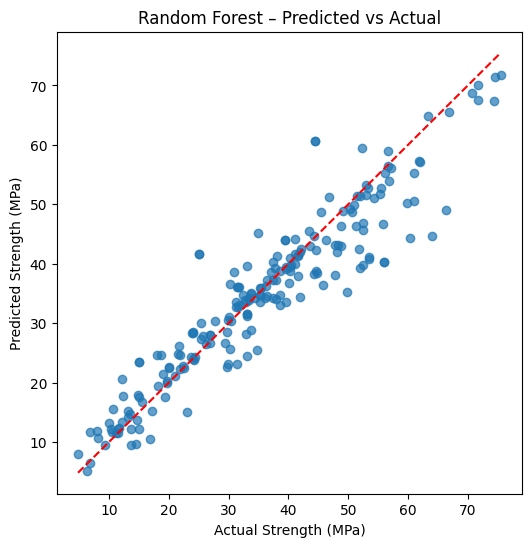

In [9]:
import matplotlib.pyplot as plt

# Linear Regression: predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_lin, alpha=0.7)
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Linear Regression – Predicted vs Actual")
plt.plot(
    [y_val.min(), y_val.max()],
    [y_val.min(), y_val.max()],
    "r--"
)
plt.show()

# Random Forest: predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_rf, alpha=0.7)
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Random Forest – Predicted vs Actual")
plt.plot(
    [y_val.min(), y_val.max()],
    [y_val.min(), y_val.max()],
    "r--"
)
plt.show()
